Neste projeto, aplicararemos machine learning nos dados extraídos do google analytics com a loja de brindes do Google.

# Imports

# Projeto de previsão de gastos

Neste projeto, será previsto o valor que usuários gastarão em um e-commerce fazendo análises dos seus padrões de uso no site e utilizando modelos de machine learning.

Para este projeto, utilizou-se uma base de dados demo do Google Analytics e os principais resultados deste modelo foram:

* Prever com certa acurácia a quantidade gasta no site.
* Possuir um desvio padrão menor que o desvio dos gastos, indicando assim maior acertividade.

Neste modelo, utilizou-se:

* Manipulações com json
* Regressão Linear
* Gradient Boosting

In [154]:
# data wrangling
import pandas as pd
import numpy as np
import json

# data visualization
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Get Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv')

# Carregando a base de dados corretamente

In [3]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [4]:
df.shape

(12283, 12)

In [5]:
df['fullVisitorId'].unique()

array([9674781571160116268, 8590648239310839049, 9772828344252850532, ...,
        696320405243257438, 5437703324867866371, 2905034275926274980],
      dtype=uint64)

In [6]:
df['fullVisitorId'].nunique()

9996

In [7]:
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

Os dados da coluna date foram identificados como inteiro. Não é possível separar os valores da data quando o formato do dado é número inteiro. O campo fullVisitorId está como inteiro também pois pode-se ter perdido zeros a esquerda, será necessário também corrigir a coluna totais, o visitId tem o mesmo problema que o fullVisitorId.

Para resolver isso, utiliza-se a função dype do Pandas ao ler o arquivo.

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv', dtype = {'date':object, 'fullVisitorId':object, 'visitId':object})

In [9]:
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                 object
visitNumber              int64
visitStartTime           int64
dtype: object

In [10]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


Algumas colunas possuem dicionários em seus valores e será necessário tratá-los.

In [11]:
df['device'].iloc[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

Para passar estes valores aos modelos de machine learning, será necessário criar colunas únicas para cada uma das chaves e colocar os valores do dicionário nelas.

In [12]:
type(df['device'].iloc[0])

str

O python identifica estes valores como string e será necessário convertê-los para dicionários. Para isso, será utilizada a biblioteca json.

In [13]:
# identifica cada par de chave valor em linhas distintas
json.loads(df['device'].iloc[0])

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [14]:
type(json.loads(df['device'].iloc[0]))

dict

A biblioteca json identificou como dicionários. Será necessário criar uma lista com todos os valores, através de list comprehension.

In [15]:
device = pd.DataFrame([json.loads(linha) for linha in df['device']])

In [16]:
device.head()

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


Agora a coluna device foi transformada em um dataframe. Agora será necessário juntar estes novos dataframes no dataframe original e droppar as colunas que as geraram.

In [17]:
geoNetwork = pd.DataFrame([json.loads(linha) for linha in df['geoNetwork']])

In [18]:
geoNetwork.head()

,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation
0,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [19]:
trafficSource = pd.DataFrame([json.loads(linha) for linha in df['trafficSource']])

In [20]:
trafficSource.head()

,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,True,NaN,NaN,NaN
4,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN


In [21]:
totals = pd.DataFrame([json.loads(linha) for linha in df['totals']])

In [22]:
totals.head()

,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,1,1,1,1,1,NaN
1,1,1,1,1,1,NaN
2,1,1,1,1,1,NaN
3,1,1,1,1,NaN,NaN
4,1,5,4,NaN,1,NaN


In [23]:
df = df.join(device, how = 'left', lsuffix = '_left', rsuffix = '_right')
df

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not availabl

In [24]:
df = df.join(geoNetwork, how = 'left', lsuffix = '_left', rsuffix = '_right')

In [25]:
df

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,no

In [26]:
df = df.join(trafficSource, how = 'left', lsuffix = '_left', rsuffix = '_right')

In [27]:
df

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054

In [28]:
df = df.join(totals, how = 'left', lsuffix = '_left', rsuffix = '_right')

In [29]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""n

In [30]:
df.drop(columns = ['device', 'geoNetwork', 'totals', 'trafficSource'], axis = 1, inplace = True)

In [31]:
df

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not avail

# Limpando a base de dados

É importante analisar a quantidade de valores distintos há em cada coluna para passar ao modelo.

In [34]:
df['adwordsClickInfo'][0]

{'criteriaParameters': 'not available in demo dataset'}

not available in demo dataset aparece por conta do Google proteger os dados mais sensíveis dos seus usuários. Como em todas as linhas esta informação não trás novos insights por não estar disponível, será necessário droppá-la.

In [35]:
# excluíndo coluna
df.drop(columns = ['adwordsClickInfo'], axis = 1, inplace = True)

In [36]:
# iterando novamente
for coluna in df.columns:
    print(coluna +': ' + str(df[coluna].nunique()))

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
campaign: 7
source: 76
medium: 7
keyword: 128
isTrueDirect: 1
referralPath: 197
adContent: 15
campaignCode: 1
visits: 1
hits: 96
pageviews: 75
bounces: 1
newVisits: 1
transactionRevenue: 146


Colunas que possuem o mesmo valor para todas as linhas não trazem nenhuma informação relevante ao modelo pois se estas possuírem o mesmo valor, isso não trará informação alguma sobre os padrões de compra dos clientes pois não haverá variação destes valores. Logo, será necessário removê-las do dataset.

In [37]:
# lista vazia para colocar colunas com baixa variação
coluna_na = []
for coluna in df.columns:
    if len(df[coluna].unique()) == 1:
        coluna_na.append(coluna)

In [38]:
coluna_na

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [39]:
# excluindo colunas
df.drop(coluna_na, axis = 1, inplace = True)

In [40]:
df

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,20170104,7330357551242339916,7330357551242339916_1483540608,1483540608,1,1483540608,Chrome,Windows,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,(not set),youtube.com,referral,NaN,NaN,/yt/about/pl/,NaN,NaN,1,1,1,1,NaN
12279,Social,20170104,696320405243257438,0696320405243257438_1483580407,1483580407,1,1483580407,Chrome,Android,True,mobile,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,vodafone-ip.de,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,1,1,1,NaN
12280,Social,20170104,5437703324867866371,5437703324867866371_1483592122,1483592122,1,1483592122,Chrome,Linux,False,desktop,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,1,1,1,NaN
12281,Social,20170104,8869363093179043393,8869363093179043393_1483601927,1483601927,2,1483601927,Chrome,Android,True,mobile,Europe,Northern Europe,Lithuania,not available in demo dataset,not available in demo dataset,not available in demo dataset,cgates.lt,(not set),youtube.com,referral,NaN,True,/yt/about/lt/,NaN,NaN,2,2,NaN,NaN,NaN


# Feature Engineering

## Entendendo as variáveis

Será necessário criar variáveis que indiquem a usabilidade dos usuários na plataforma de e-commerce para descobrir níveis de interação, clicks, visitas e etc.

As variáveis quantitativas que mais demonstram o engajamento dos usuários serão 4:

* newVisits: coluna dummy que mostra se é a primeira visita do usuário ou não.

* pageviews: coluna que mostra quantas páginas o usuário viu durante a sessão a partir do momento em que ele acessou o site.

* bounces (ou rejeição): Visita que não gera nenhuma interação.

* hits: mede o volume de interação que o Google recebeu do site. Ajuda a entender quanto o usuário interagiu no site.

In [41]:
df.dtypes

channelGrouping       object
date                  object
fullVisitorId         object
sessionId             object
visitId               object
visitNumber            int64
visitStartTime         int64
browser               object
operatingSystem       object
isMobile                bool
deviceCategory        object
continent             object
subContinent          object
country               object
region                object
metro                 object
city                  object
networkDomain         object
campaign              object
source                object
medium                object
keyword               object
isTrueDirect          object
referralPath          object
adContent             object
campaignCode          object
hits                  object
pageviews             object
bounces               object
newVisits             object
transactionRevenue    object
dtype: object

In [42]:
quant = ['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [43]:
# substitui o valor numérico da coluna
for coluna in quant:
    df[coluna] = pd.to_numeric(df[coluna])

A função to_numeric converte as colunas passadas e identifica o valor e formato mais adequado para cada coluna.

In [44]:
df[quant]

,bounces,hits,newVisits,pageviews,transactionRevenue
0,1.0,1,1.0,1,NaN
1,1.0,1,1.0,1,NaN
2,1.0,1,1.0,1,NaN
3,1.0,1,NaN,1,NaN
4,NaN,5,1.0,4,NaN
...,...,...,...,...,...
12278,1.0,1,1.0,1,NaN
12279,1.0,1,1.0,1,NaN
12280,1.0,1,1.0,1,NaN
12281,NaN,2,NaN,2,NaN


In [45]:
df[quant].dtypes

bounces               float64
hits                    int64
newVisits             float64
pageviews               int64
transactionRevenue    float64
dtype: object

# Missing values da coluna transactionRevenue

In [46]:
df['transactionRevenue']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12278   NaN
12279   NaN
12280   NaN
12281   NaN
12282   NaN
Name: transactionRevenue, Length: 12283, dtype: float64

In [47]:
df['transactionRevenue'].value_counts()

13590000.0     3
19190000.0     3
33590000.0     3
31490000.0     2
69990000.0     2
55990000.0     2
4990000.0      2
5970000.0      2
16990000.0     2
1990000.0      2
18990000.0     2
15190000.0     2
23490000.0     2
27190000.0     2
45570000.0     2
36780000.0     1
42370000.0     1
9160000.0      1
67120000.0     1
16780000.0     1
24990000.0     1
20780000.0     1
52020000.0     1
2730000.0      1
35980000.0     1
59980000.0     1
9990000.0      1
25900000.0     1
59990000.0     1
279970000.0    1
372650000.0    1
132580000.0    1
19750000.0     1
127120000.0    1
755630000.0    1
32420000.0     1
3990000.0      1
34990000.0     1
79190000.0     1
55960000.0     1
306720000.0    1
9980000.0      1
52490000.0     1
26950000.0     1
217440000.0    1
200890000.0    1
105490000.0    1
17590000.0     1
102350000.0    1
14000000.0     1
23950000.0     1
489200000.0    1
144970000.0    1
27180000.0     1
192870000.0    1
23970000.0     1
89990000.0     1
66960000.0     1
7990000.0     

In [48]:
df['transactionRevenue'].isnull().sum()

12119

In [49]:
df.shape

(12283, 31)

A grande maioria das colunas do dataframe possui valores nulos.

Alguns modelos de machine learning não aceitarão missing values. Estes valores corresppondem a usuários que não fizeram compras no site. Pode-se transformar estes valores pra zero.

In [50]:
# fillando valores nulos com 0
df['transactionRevenue'].fillna(value = 0, inplace = True)

In [51]:
df['transactionRevenue']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12278    0.0
12279    0.0
12280    0.0
12281    0.0
12282    0.0
Name: transactionRevenue, Length: 12283, dtype: float64

Valores nulos agora encontram-se como 0.

In [52]:
df['transactionRevenue'].value_counts()

0.0            12119
13590000.0         3
33590000.0         3
19190000.0         3
27190000.0         2
69990000.0         2
1990000.0          2
5970000.0          2
18990000.0         2
55990000.0         2
4990000.0          2
16990000.0         2
15190000.0         2
31490000.0         2
45570000.0         2
23490000.0         2
26950000.0         1
20780000.0         1
67120000.0         1
200890000.0        1
284340000.0        1
24990000.0         1
36780000.0         1
42370000.0         1
279970000.0        1
2730000.0          1
102350000.0        1
35980000.0         1
59980000.0         1
9160000.0          1
132580000.0        1
372650000.0        1
52490000.0         1
19750000.0         1
127120000.0        1
755630000.0        1
32420000.0         1
3990000.0          1
34990000.0         1
79190000.0         1
306720000.0        1
9980000.0          1
217440000.0        1
9990000.0          1
17590000.0         1
59990000.0         1
66960000.0         1
267200000.0  

Os números de gasto são muito grandes pois tratando-se de uma loja de brindes, cada item custam valores baixos.

Todos os valores de transactionRevenue estão multiplicados por 1 milhão segundo a [documentação do Google](https://developers.google.com/analytics/devguides/reporting/core/v4/changelog).

Portanto será necessário corrigir tais valores de transações.

In [53]:
df['transactionRevenue'] = df['transactionRevenue'] / 1000000

In [54]:
df['transactionRevenue'].value_counts()

0.00      12119
13.59         3
33.59         3
19.19         3
27.19         2
69.99         2
1.99          2
5.97          2
18.99         2
55.99         2
4.99          2
16.99         2
15.19         2
31.49         2
45.57         2
23.49         2
26.95         1
20.78         1
67.12         1
200.89        1
284.34        1
24.99         1
36.78         1
42.37         1
279.97        1
2.73          1
102.35        1
35.98         1
59.98         1
9.16          1
132.58        1
372.65        1
52.49         1
19.75         1
127.12        1
755.63        1
32.42         1
3.99          1
34.99         1
79.19         1
306.72        1
9.98          1
217.44        1
9.99          1
17.59         1
59.99         1
66.96         1
267.20        1
17.98         1
8.48          1
62.05         1
269.55        1
7.99          1
89.99         1
105.49        1
23.97         1
192.87        1
27.18         1
144.97        1
489.20        1
23.95         1
53.97         1
49.99   

## Criando Variáveis

Cada usuário possui um fullVisitorId.

In [55]:
len(set(df['fullVisitorId']))

9997

In [56]:
df.shape

(12283, 31)

Alguns usuários utilizaram o site mais de uma vez, pois o número de usuários (9997) é menor que o número total de visitas registradas no dataset.

In [57]:
# soma de todas as colunas quantitativas para cada usuário
df.groupby(by = 'fullVisitorId').sum()

,visitNumber,visitStartTime,isMobile,hits,pageviews,bounces,newVisits,transactionRevenue
fullVisitorId,,,,,,,,
0002365800130207040,1,1472974804,0,1,1,1.0,1.0,0.0
0010286039787739137,1,1475084026,0,4,3,0.0,1.0,0.0
0011056874471185769,1,1480996024,0,2,2,0.0,1.0,0.0
0014443856125569702,1,1475423502,0,1,1,1.0,1.0,0.0
0017260116665815114,6,1492707286,0,2,2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
9996691020299725061,3,1482388264,0,10,10,0.0,0.0,0.0
9996793353803109760,1,1480566609,1,1,1,1.0,1.0,0.0
9997125062030599880,1,1484217422,1,8,8,0.0,1.0,0.0


In [58]:
df_quant = df.groupby(by = 'fullVisitorId', as_index = False)[quant].sum()

In [59]:
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


Agora temos para cada usuário as variáveis quantitativas escolhidas.

In [60]:
df_quant.shape

(9997, 6)

Este será o dataset preparado para criar o modelo de machine learning preditivo.

# Treinando o modelo

In [61]:
# utilizando uma cópia da variável target
y = df_quant[['transactionRevenue']].copy()

# variáveis que serão utilizadas para a predição
X = df_quant.drop(columns = 'transactionRevenue', axis = 1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 42)

Será reservado 30% dos dados totais para o teste do modelo.

## Regressão Linear

In [63]:
reg = LinearRegression() # instanciando o modelo

In [64]:
reg.fit(X = X_train, y = y_train) # treinando o modelo com os dados de teste

LinearRegression()

In [65]:
reg_predict = reg.predict(X = X_test) # array com valores preditos

## Resultados da Regressão Linear

In [66]:
resultados = pd.DataFrame() # dataframe de resultados
resultados['revenue'] = y_test # valores comprados pelo usuário
resultados['predict'] = reg_predict # valores preditos
resultados['erro'] = reg_predict - y_test # erro entre a predição e o valor real

In [67]:
resultados.head()

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


In [68]:
# predições para usuários que gastaram
resultados[resultados['revenue'] > 0].head(10)

,revenue,predict,erro
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275
4077,5.97,1.554336,-4.415664
8146,27.19,1.318915,-25.871085
4908,372.65,1.505642,-371.144358
9395,29.98,1.779852,-28.200148
8728,101.95,1.284318,-100.665682


## Mean square error

In [69]:
MSE = np.mean((reg_predict - y_test) ** 2)
MSE

transactionRevenue    807.24593
dtype: float64

## Square root mean square error

In [70]:
RSME = np.sqrt(np.mean((reg_predict - y_test) ** 2))
RSME

transactionRevenue    28.412074
dtype: float64

## RSME no Sci-kit Learn

In [71]:
np.sqrt(mean_squared_error(y_test, reg_predict))

28.412073660366516

In [72]:
np.mean(df_quant['transactionRevenue']) # média de gastos 

1.778953686105832

In [73]:
np.std(df_quant['transactionRevenue']) # desvio padrão dos gastos

25.129905708016967

O modelo está errando mais que o desvio padrão da base original.

# Análise gráfica dos resultados

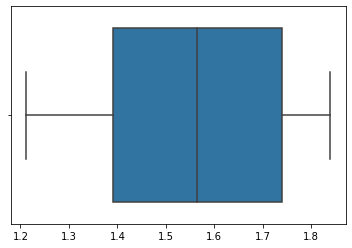

In [74]:
ax = sns.boxplot(reg_predict)
ax = ax

In [75]:
y_test

,transactionRevenue
4122,0.0
4065,0.0
1731,0.0
4740,0.0
6391,0.0
...,...
5580,0.0
1074,0.0
3063,0.0
4554,0.0


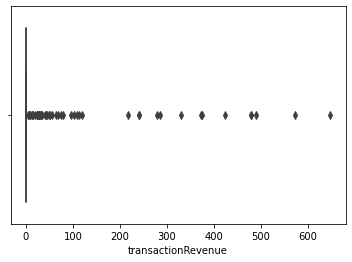

In [76]:
ax = sns.boxplot(y_test['transactionRevenue'])
ax = ax

Os valores gerados pelo algoritmo são bem diferentes dos valores originais.

In [77]:
reg_predict

array([[1.55166047],
       [1.55520911],
       [1.68772647],
       ...,
       [1.61310964],
       [1.52678998],
       [1.58119137]])

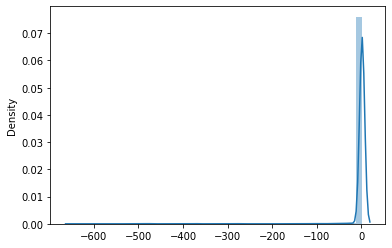

In [78]:
ax = sns.distplot(reg_predict - y_test)
ax = ax

Essa concentração perto de 0 dá-se por conta dos erros de previsão do modelo ao realizar previsões de baixo valor para aqueles usuários que não realizaram compras.

# Melhorando o feature engineering

Para melhorar o modelo, pode-se incluir novas variáveis. As informações sobre a primeira e última visita, bem como os tipos de device utilizados são de suma importância para entender os padrões de compra dos clientes.

* Quais foram os valores qualitativos da primeira visita?
* Quais foram os valores qualitativos da última visita?

In [79]:
visitas_ultima = df.groupby(by = 'fullVisitorId', as_index = False).agg({'visitNumber':'max'})
visitas_ultima

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6
...,...,...
9992,9996691020299725061,3
9993,9996793353803109760,1
9994,9997125062030599880,1
9995,9997464307347866920,1


Para trazer todas as informações das últimas visitas, obtem-se do dataframe original.

In [80]:
usuarios_visitas_unicos = df.drop_duplicates(subset = ['fullVisitorId', 'visitNumber'])

In [81]:
usuarios_visitas_unicos

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,20170104,7330357551242339916,7330357551242339916_1483540608,1483540608,1,1483540608,Chrome,Windows,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,(not set),youtube.com,referral,NaN,NaN,/yt/about/pl/,NaN,NaN,1,1,1.0,1.0,0.0
12279,Social,20170104,696320405243257438,0696320405243257438_1483580407,1483580407,1,1483580407,Chrome,Android,True,mobile,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,vodafone-ip.de,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,1,1.0,1.0,0.0
12280,Social,20170104,5437703324867866371,5437703324867866371_1483592122,1483592122,1,1483592122,Chrome,Linux,False,desktop,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,1,1.0,1.0,0.0
12281,Social,20170104,8869363093179043393,8869363093179043393_1483601927,1483601927,2,1483601927,Chrome,Android,True,mobile,Europe,Northern Europe,Lithuania,not available in demo dataset,not available in demo dataset,not available in demo dataset,cgates.lt,(not set),youtube.com,referral,NaN,True,/yt/about/lt/,NaN,NaN,2,2,NaN,NaN,0.0


Agora garante-se que essas colunas possuem valores únicos e não há informações duplicadas no dataframe, logo, será possível combinar tais informações com aquelas do dataframe de últimas visitas.

In [82]:
visitas = pd.merge(left = visitas_ultima, right = usuarios_visitas_unicos,
                  left_on = ['fullVisitorId', 'visitNumber'],
                  right_on = ['fullVisitorId', 'visitNumber'],
                  how = 'left')

In [83]:
visitas

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,20161221,9996691020299725061_1482388264,1482388264,1482388264,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN,10,10,NaN,NaN,0.0
9993,9996793353803109760,1,Social,20161130,9996793353803109760_1480566609,1480566609,1480566609,Chrome,Android,True,mobile,Asia,Southeast Asia,Thailand,Nakhon Ratchasima,(not set),(not set),3bb.co.th,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN,1,1,1.0,1.0,0.0
9994,9997125062030599880,1,Organic Search,20170112,9997125062030599880_1484217422,1484217422,1484217422,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,8,8,NaN,1.0,0.0
9995,9997464307347866920,1,Organic Search,20170314,9997464307347866920_1489504370,1489504370,1489504370,Chrome,Android,True,mobile,Europe,Southern Europe,Greece,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0


Agora tem-se todas as informações dessa última visita. Será também preciso fazer o mesmo processo para ter informações sobre a primeira visita.

In [84]:
visitas_primeira = df.groupby(by = 'fullVisitorId').agg({'visitNumber':'min'})
visitas_primeira

,visitNumber
fullVisitorId,
0002365800130207040,1
0010286039787739137,1
0011056874471185769,1
0014443856125569702,1
0017260116665815114,6
...,...
9996691020299725061,3
9996793353803109760,1
9997125062030599880,1


In [85]:
visitas = visitas.join(visitas_primeira, how = 'left',
                on = 'fullVisitorId', rsuffix = '_primeira')

In [86]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue,visitNumber_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6


In [87]:
visitas = pd.merge(left = visitas, right = usuarios_visitas_unicos,
                  left_on = ['fullVisitorId', 'visitNumber_primeira'],
                  right_on = ['fullVisitorId', 'visitNumber'],
                  how = 'left', suffixes = ['_ultima', '_primeira'])

In [88]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,hits_ultima,pageviews_ultima,bounces_ultima,newVisits_ultima,transactionRevenue_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,sessionId_primeira,visitId_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,hits_primeira,pageviews_primeira,bounces_primeira,newVisits_primeira,transactionRevenue_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not a

# Limpando a nova base de dados

In [89]:
quant

['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

Para droppar tais colunas do dataframe:

In [90]:
for coluna in quant:
    visitas.drop(coluna + '_ultima', axis = 1, inplace = True)
    visitas.drop(coluna + '_primeira', axis = 1, inplace = True)

In [91]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,sessionId_primeira,visitId_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


As informações de id não serão relevantes para a criação do modelo de machine learning pois é utilizado somente para identificação do usuário.

Para a modelagem, será necessário manter as colunas que tragam informações sobre a navegação do usuário e seus padrões de usabilidade.

In [92]:
visitas.drop(columns = ['sessionId_ultima', 'visitId_ultima', 
                        'sessionId_primeira', 'visitId_primeira'], axis = 1, inplace = True)

In [93]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [94]:
# lista de colunas a serem excluídas
geo = ['city_primeira', 'continent_primeira', 'country_primeira', 'region_primeira', 'metro_primeira', 'networkDomain_primeira', 'subContinent_primeira']

In [95]:
visitas.drop(columns = geo,
axis = 1, inplace = True)

In [96]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


Agora o dataset está limpo com informações sobre os usuários que fazem sentido para as análises.

# Criando diversas variáveis

In [97]:
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


Pode-se trazer o df_quant utilizado anteriormente pra dentro do dataset de visitas.

In [98]:
visitas = pd.merge(left = visitas, right = df_quant,
                  left_on = ['fullVisitorId'],
                  right_on = ['fullVisitorId'],
                  how = 'left')

In [99]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0


A coluna visit start time traz o momento exato da visita em timestamp. Pode-se calcular a quantidade de tempo entre a primeira e última visita.

In [100]:
visitas['tempo_diff'] =visitas['visitStartTime_ultima'] - visitas['visitStartTime_primeira']

In [101]:
# contagem de vezes que apareceu um visit number para cada usuário.
visits = df.groupby(by = 'fullVisitorId', as_index = False).count()['visitNumber'].values

In [102]:
visitas['visits'] = visits

In [103]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_diff,visits
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1


Será interessante criar variáveis para identificar ano, mês e dia. Estas variáveis serão importantes para extrair informações dessas variáveis e descobrir o ano e o dia que tais usuários acessaram. O mês que o usuário acessa pode fazer diferença ao considerar a sazonalidade ou um determinado ano pode ser melhor que outro. Para fazer tais análises, vamos criar variáveis para representar as datas.

# Criando colunas de data

In [104]:
# criando a coluna de ano da última visita dentro do dataframe
visitas['ano_ultima'] = pd.to_numeric([data [0:4] for data in visitas['date_ultima']])
# criando a coluna de mês da última visita dentro do dataframe
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas['date_ultima']])
# criando a coluna de dia da última visita dentro do dataframe
visitas['dia_ultima'] = pd.to_numeric([data[6:] for data in visitas['date_ultima']])

# criando a coluna de ano da primeira visita dentro do dataframe
visitas['ano_primeira'] = pd.to_numeric([data [0:4] for data in visitas['date_primeira']])
# criando a coluna de mês da primeira visita dentro do dataframe
visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in visitas['date_primeira']])
# criando a coluna de dia da primeira visita dentro do dataframe
visitas['dia_primeira'] = pd.to_numeric([data[6:] for data in visitas['date_primeira']])

# Tipos das colunas

In [110]:
visitas.dtypes

fullVisitorId                object
visitNumber_ultima            int64
channelGrouping_ultima       object
date_ultima                  object
visitStartTime_ultima         int64
browser_ultima               object
operatingSystem_ultima       object
isMobile_ultima                bool
deviceCategory_ultima        object
continent_ultima             object
subContinent_ultima          object
country_ultima               object
region_ultima                object
metro_ultima                 object
city_ultima                  object
networkDomain_ultima         object
campaign_ultima              object
source_ultima                object
medium_ultima                object
keyword_ultima               object
isTrueDirect_ultima          object
referralPath_ultima          object
adContent_ultima             object
campaignCode_ultima          object
visitNumber_primeira          int64
channelGrouping_primeira     object
date_primeira                object
visitNumber_primeira        

In [111]:
visitas.drop(columns = ['fullVisitorId'], axis = 1, inplace = True)

In [112]:
y = visitas['transactionRevenue'].copy()
X = visitas.drop(columns = ['transactionRevenue'], axis = 1)

# Tratando variáveis categóricas

In [121]:
# lista com variáveis qualitativas do dataframe
quali = visitas.dtypes[visitas.dtypes == object].keys()

In [134]:
# enconding cada uma das colunas qualitativas
for coluna in quali:
    lbl = LabelEncoder()
    strings = list(X[coluna].values.astype('str'))
    lbl.fit(strings)
    X[coluna] = lbl.transform(strings)

In [136]:
X.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,tempo_diff,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,7,34,1472974804,7,9,False,0,4,7,135,205,50,286,1652,0,74,6,81,1,174,11,1,1,7,34,1,1472974804,7,9,False,0,0,72,6,80,1,174,10,1,1.0,1,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,58,1475084026,5,3,False,0,2,11,138,116,20,120,0,0,23,5,4,1,192,11,1,1,4,58,1,1475084026,5,3,False,0,0,20,5,4,1,192,10,1,0.0,4,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,126,1480996024,5,9,False,0,3,15,101,205,50,286,1106,0,74,6,81,1,124,11,1,1,7,126,1,1480996024,5,9,False,0,0,72,6,80,1,124,10,1,0.0,2,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,62,1475423502,15,9,False,0,4,7,106,24,0,37,1165,0,74,6,81,1,173,11,1,1,7,62,1,1475423502,15,9,False,0,0,72,6,80,1,173,10,1,1.0,1,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,262,1492707286,18,6,False,0,2,11,138,205,50,286,333,0,0,0,81,0,192,11,1,6,2,262,6,1492707286,18,6,False,0,0,0,0,80,0,192,10,1,0.0,2,0.0,2,0,1,2017,4,20,2017,4,20


# Regressão Linear

Após limpar a base de dados, treinemos uma regressão linear.

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [138]:
reg = LinearRegression()

In [139]:
reg.fit(X_train, y_train)

LinearRegression()

In [141]:
reg_predict = reg.predict(X_test)

In [148]:
# transforma valores negativos de predição em nulos
reg_predict[reg_predict < 0] = 0

In [149]:
resultados = pd.DataFrame() # dataframe de resultados
resultados['revenue'] = y_test # valores comprados pelo usuário
resultados['predict'] = reg_predict # valores preditos
resultados['erro'] = reg_predict - y_test # erro entre a predição e o valor real

In [150]:
resultados.head()

,revenue,predict,erro
4122,0.0,0.059318,0.059318
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.346457,0.346457
6391,0.0,0.000000,0.000000


In [151]:
resultados[resultados['revenue'] > 0]

,revenue,predict,erro
3006,32.49,14.557813,-17.932187
5928,74.85,36.128803,-38.721197
8361,424.50,18.343408,-406.156592
8612,55.99,16.422798,-39.567202
416,15.19,22.542194,7.352194
4077,5.97,15.174934,9.204934
8146,27.19,13.553056,-13.636944
4908,372.65,129.580267,-243.069733
9395,29.98,20.437489,-9.542511
8728,101.95,89.037523,-12.912477


O modelo não apresenta mais o comportamento padrão e tem-se agora um modelo em que os usuários gastam mais, em alguns valores chegou-se bem perto do previsto.

# RSME

In [152]:
np.sqrt(mean_squared_error(y_test, reg_predict))

25.03222940824554

O modelo melhorou pois o RSME está menor que o desvio padrão dos dados. 

# Gráficos

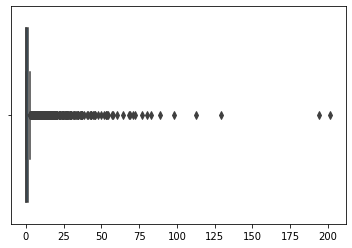

In [153]:
ax = sns.boxplot(reg_predict)
ax = ax

O modelo agora representa o comportamento mais real da variação dos valores gastos em compras dos clientes. 

# Gradient Boosting

O gradient boosting criará vários pequenos preditores e sequenciais. O que foi aprendido em um pequeno preditor, serão utilizados para aprendizado do próximo e ao longo do que o modelo aprendeu, este cria um modelo de regressão.

In [156]:
gb = GradientBoostingRegressor(random_state = 42)

In [158]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [159]:
gb_predict = gb.predict(X_test)

In [163]:
gb_predict[gb_predict < 0] = 0

In [164]:
gb_predict

array([0.02242292, 0.        , 0.        , ..., 0.32247215, 0.        ,
       0.        ])

In [ ]:
resultados = pd.DataFrame() # dataframe de resultados
resultados['revenue'] = y_test # valores comprados pelo usuário
resultados['predict'] = reg_predict # valores preditos
resultados['erro'] = reg_predict - y_test # erro entre a predição e o valor real

In [165]:
resultados

,revenue,predict,erro
4122,0.0,0.059318,0.059318
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.346457,0.346457
6391,0.0,0.000000,0.000000
...,...,...,...
5580,0.0,2.891361,2.891361
1074,0.0,0.000000,0.000000
3063,0.0,1.618257,1.618257
4554,0.0,0.000000,0.000000


# RMSE

In [167]:
np.sqrt(mean_squared_error(y_test, gb_predict))

23.10004349029805

O modelo apresenta boa performance pois apresenta um valor ainda menor que o desvio padrão dos gastos no site, sendo assim, este modelo encontra-se pronto para se pôr em produção.